## Analyzing and Predicting the Probability of Developing  Chronic Heart Disease ##
**Using Framingham Heart Study Dataset**

### Introduction ###

- The dataset used in this project is obtained from a [Kaggle](https://www.kaggle.com/amanajmera1/framingham-heart-) competition
- The original data is from a project called the Framingham study which is done by the University of Boston

### The significance of te project ###
**According to [Center for Disease Control and Prevention](https://www.cdc.gov/heartdisease/facts.htm):**

- Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States
- Heart disease costs the United States about 219 billion dollars each year from 2014 to 2015 
- Analyzing and predicting the likelihood of developing CHD could help greatly in implementing prevention strategies to decrease the occurrence of CHD and therefore reducing the number of deaths in the US and the cost 

### The goal is to use the available data to predict the likelihood of developing coronary heart disease  ###
 
#### Workflow:####
- Load the dataset and inspect it for missing values, duplicated values, and outliers. Take the proper action in dealing with these values 
- Perform exploratory data analysis on the variables to understand the relationship between them and how each variable relates to the target variable
- Use logistic regression model to predictions 
- Draw conclusions 

In [200]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set (color_codes=True)

### Loading, understanding, and cleaning the dataset ###

In [201]:
heart = pd.read_csv('framingham.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### The data attributes###

- **Male**: 0 = No  1 = Yes 
- **Age**: Age at exam time 
- **Education** : 1 = Some High School  2 = High School or GED  3 = Some College or Vocational School  4 = college
- **CurrentSmoker**: 0 = nonsmoker; 1 = smoker
- **CigsPerDay**: the number of cigarettes smoked in a day
- **BPMeds**: 0 = Not on Blood Pressure medications   1 = Is on Blood Pressure medications
- **PrevalentStroke**: 0 = No  1 = Yes
- **PrevalentHyp**: 0 = No  1 = Yes 
- **Diabetes**: 0 = No  1 = Yes
- **TotChol**: total cholesterol level (mg/dL)
- **SysBP**: systolic blood pressure (mmHg)
- **DiaBP**: diastolic blood pressure (mmHg)
- **BMI**: Body Mass Index
- **HeartRate**: Beats/Min (Ventricular)
- **Glucose**: glucose level (mg/dl)
- **TenYearCHD**: risk of coronary heart disease CHD (0 = No  1 = Yes) 

In [202]:
# Understand the data 
print(heart.info())
print("\n")
null_values = heart.isnull().sum()
print(null_values)

total_missing = null_values.sum()
print(total_missing)
print("\n")
print("The dataset has a total of {} missing values, which accounts for {}%".
      format(total_missing, round((total_missing/heart.shape[0])*100)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes

### Dealing with missing data 

Identify the columns with missing data.

- **education**: accounts for 2.47% of the data
- **cigsPerDay**: accounts for 0.68% of the data
- **BPMeds**: accounts for 1.25% of the data
- **totChol**: accounts for 1.17% of the data
- **BMI**: accounts for 0.44% of the data
- **heatRate**: only one missing value
- **glucose**: accounts for 9.15% of the data

Take a closer look at each column then decide on how to handle the missing values. 

Use the column currentSmooker to help fill missing values in the column cigsPerDay. 
If the individual is not a smooker, then they smooke 0 cigsperday. Then, fill the rest of the missing values using the mean of cigsPerDay.

In [203]:
print(heart["currentSmoker"].value_counts())
print("\n")
non_smooker = heart["currentSmoker"] == 0.0
print(heart["cigsPerDay"][non_smooker].sum())

heart["cigsPerDay"] = heart["cigsPerDay"].fillna(np.mean(heart["cigsPerDay"]))
heart["cigsPerDay"].isnull().sum()

0    2145
1    2095
Name: currentSmoker, dtype: int64


0.0


0

The column that accounts for the most missing values is glucose. the missing values could be filled using the column diabetes. However, it is not not known whether if the glucose levels were taken while fasted or not. Therefore, filling the missing values is not justifiable. Therefore, all the missing values will be dropped. The same apply for the rest of the columns education, totChol,BMI, BPMeds, and HeartRate.

In [204]:
print(heart.shape)

heart = heart.dropna()

print(heart.shape)



(4240, 16)
(3681, 16)


**Check for the presence of outliers**

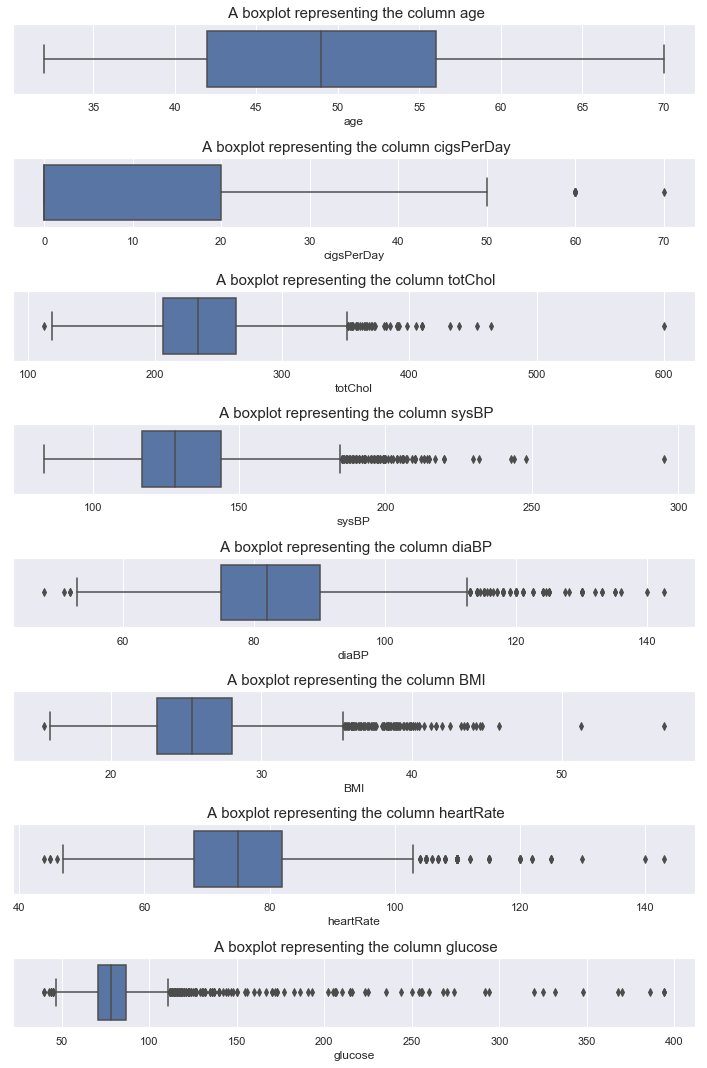

In [205]:
# save all the numeric columns in one variable 
heart_numeric = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# visulize these values to detect outliers 

fig, ax = plt.subplots (len(heart_numeric), figsize = (10, 15))
for n,k in enumerate(heart_numeric):
    sns.boxplot(heart[k], ax=ax[n], orient='h')
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)


Although the graphs above show high varience, these recordings will not be modified, outliers will not be dropped. The high range of recordings is expected because of the many variable that could influence the numbers such as smoking, illness , and conditions.

### Understanding the relationship between the variables###

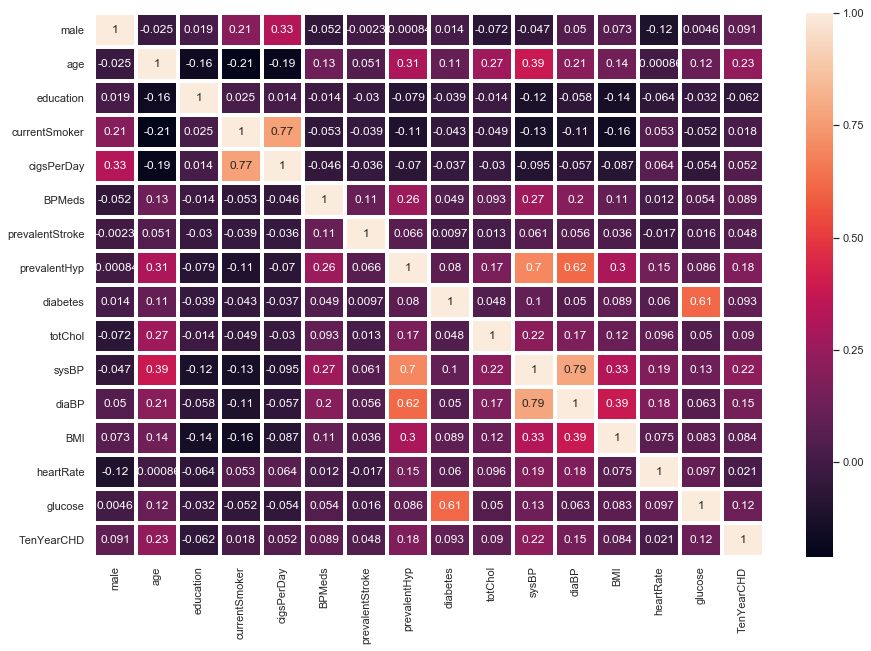

In [206]:
correlation = heart.corr()

fig, ax = plt.subplots (figsize = (15, 10))
sns.heatmap(correlation, annot=True, linecolor='white', linewidths=3)

The map above shows correlation between variables. The closer to 1 or -1, the more correlated. Any correlation that is either equal or close to zero are not wanted

## Determining and Exploring the Target Column## 

The column TenYearCHD is has binary values indicating whether the patient is at risk of developing CHD, this column will be the target column. The rest of the columns will be used to predict chances of devoloping CHD.

** Exploring the column TenYearCHD **

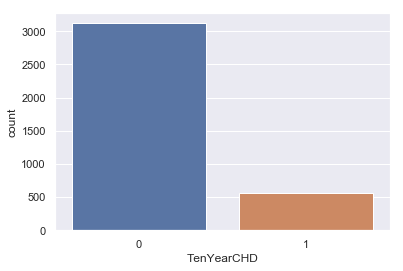

In [207]:
sns.countplot(x='TenYearCHD',data=heart)

The plot above shows the proportion of individuals who are at risk of CHD (1), to the proportion of individuals who are not (0). Next, further exploration between TenYearCHD and other columns will be presented.

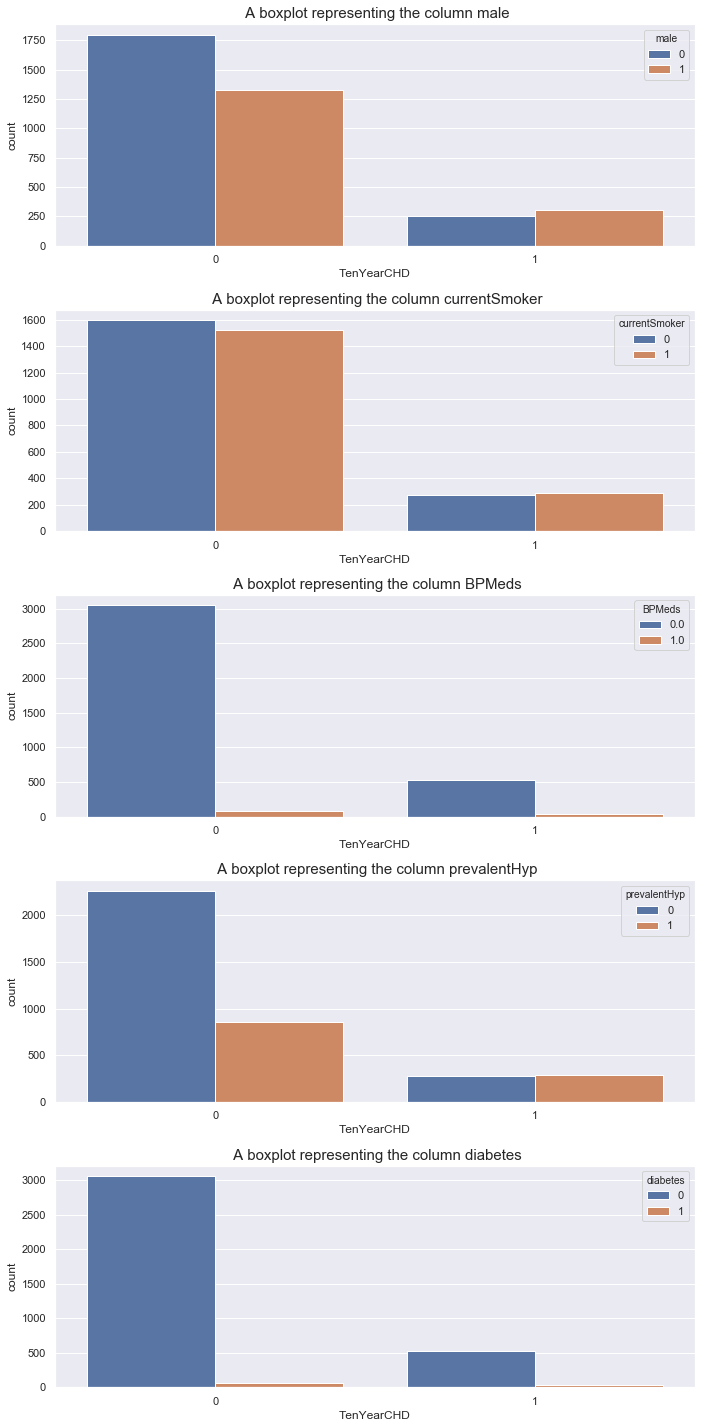

In [208]:
heart_binary = ['male', 'currentSmoker','BPMeds','prevalentHyp', 'diabetes']

fig, ax = plt.subplots (len(heart_binary), figsize = (10, 20))
for n,k in enumerate(heart_binary):
    sns.countplot(x=heart['TenYearCHD'], hue = heart[k], ax=ax[n])
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)
    

The plots above show that male and current smokers are at a higher risk in being diagnosed with CHD 

C:\Users\Khader\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


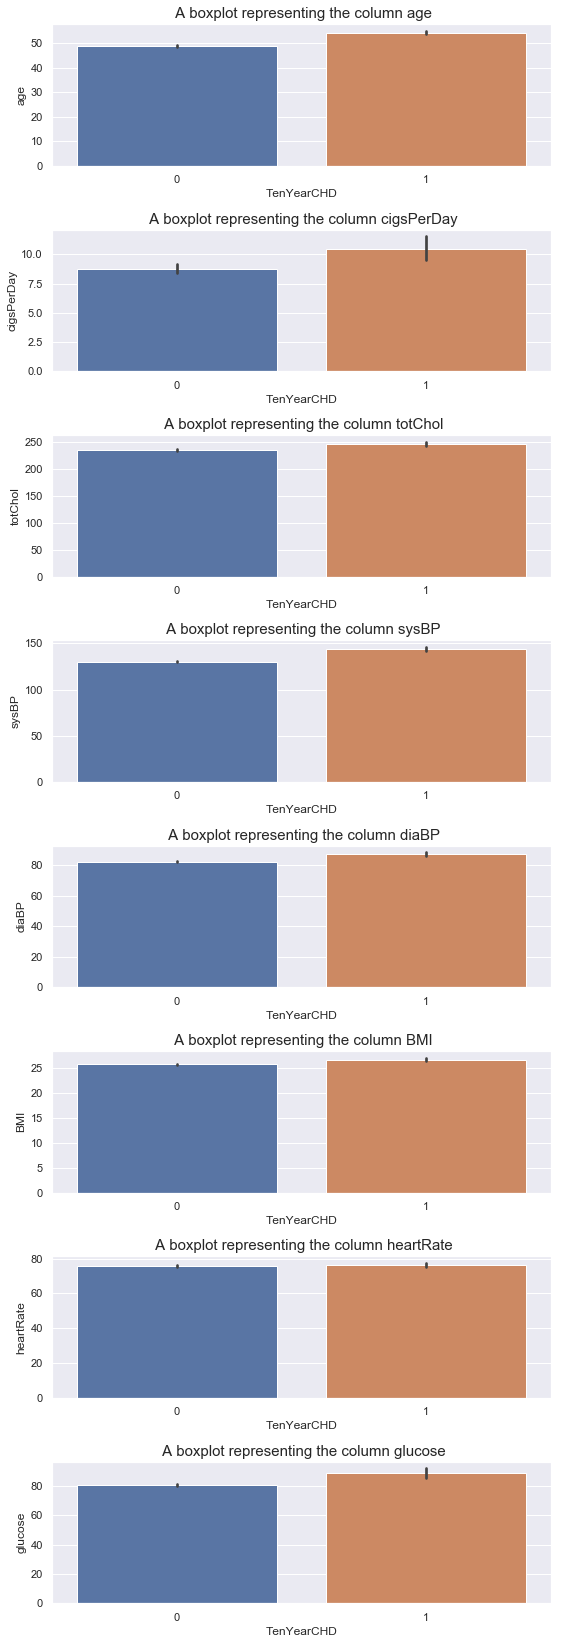

In [209]:
fig, ax = plt.subplots (len(heart_numeric), figsize = (8, 23))
for n,k in enumerate(heart_numeric):
    sns.barplot(x=heart['TenYearCHD'], y = heart[k], ax=ax[n])
    ax[n].set_title(" A boxplot representing the column" + " " + k, fontsize = 15)
    fig.tight_layout(pad = 1.1)


Factors such as age, number of cigarettes per day, blood pressure, and glucose levels show a clear effect on the chances of being diagnosed with CHD. There are factors that are less associated with the risk of being diagnosed with CHD such as cholesterol levels and body mass index.

** Why males are more likely to be at the risk of being diagnosed with CHD ? **

The plot below shows that men consume more cigerates per day resulting in the increase of risk of being diagnsed with CHD.

C:\Users\Khader\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


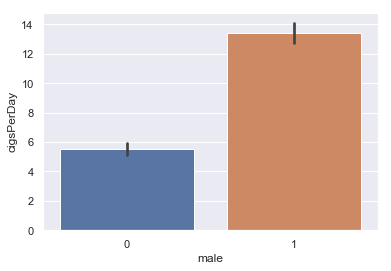

In [210]:
sns.barplot(x=heart['male'], y = heart['cigsPerDay'])

### Predicting CHD Using Logistic regression model##

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

**Next steps:**
- Create a variable that contains all the columns exept 'TenYearCHD' for normalization and train/slpit purposes 
- Normalize the data 
- Add 'TenYearCHD' back to the dataframe
- Train and split the data

In [212]:
# assign the all the column names, exept 'TenYearCHD', to columns 
columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

# Normalize the data 
x = heart[columns]

heart_normalized = (x - x.min())/(x.max() - x.min())

# add the column 'TenYearCHD2' to heart_normalized 
heart_normalized['TenYearCHD'] = heart["TenYearCHD"]

# train and split the data 
X_train, X_test, y_train, y_test = train_test_split(heart_normalized[columns],
                                                    heart_normalized['TenYearCHD'], test_size=0.20, random_state=42)

**To facilitate this procedure, we will write some functions that will:**
- Fit the model and produce prediction value
- Use cross validation model to validate the model
- Print a statement regarding the results 
- Calculate the lower and upper confidence intervals 

In [213]:
def pred_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    model_predict = model.predict(X_test)
    model_score = model.score(X_test,y_test)
    return(model_predict, model_score)
   

kf = KFold(10, shuffle = True, random_state= 1)

def validate(model):
    model_val_score = cross_val_score(model, heart_normalized[columns], heart_normalized['TenYearCHD'], cv=kf)
    mean_model_val_score = np.mean(model_val_score)
    return(mean_model_val_score)

def print_statment(prediction, validation):
    print("The number of mislabeled points out of a total %d points : %d"
          % (X_test.shape[0],(y_test != prediction).sum()))
    print("Which equates to an accuracy of",((y_test == prediction).sum()/X_test.shape[0]))
    print('The cross validation shows that the model has an accuracy of', validation)
    
def conf_inter(value):
    UCI = value + (1.96 * np.sqrt((value * (1-value))/X_test.shape[0]))
    LCI = value - (1.96 * np.sqrt((value * (1-value))/X_test.shape[0]))
    return(UCI,LCI)

** Logistic regression hyperparameter tuning **


The goal is to use randomized search cv to find the best parameters for the logistic regression model 

In [214]:
LR_pram_dist = {"solver":["newton-cg","lbfgs", "liblinear", "sag", "saga"],
                "multi_class":["ovr","auto"],
                "C":[0.001,0.01,0.1,1,10,100]}

LLL = LogisticRegression()

LLL_cv = RandomizedSearchCV(LLL,LR_pram_dist,cv=10)

LLL_cv.fit(X_train,y_train)

print("Tuned logistc regression Parameters:{}".format(LLL_cv.best_params_))
print("Best score is: {}".format(LLL_cv.best_score_))

Tuned logistc regression Parameters:{'solver': 'liblinear', 'multi_class': 'auto', 'C': 1}
Best score is: 0.8556385869565217


In [215]:
LRM = LogisticRegression(random_state=0, solver='saga', multi_class='auto',C=100)
logistic, logistic_score = pred_accuracy(LRM, X_train, X_test, y_train, y_test)
logistic_validate = validate(LRM)
print_statment(logistic,logistic_validate)
Upper_CI,Lower_CI = conf_inter(logistic_validate)
print("We are 95% confident that the validation score lies between {} and {}".format(Lower_CI,Upper_CI))

The number of mislabeled points out of a total 737 points : 118
Which equates to an accuracy of 0.8398914518317503
The cross validation shows that the model has an accuracy of 0.8533043183692707
We are 95% confident that the validation score lies between 0.8277606678373334 and 0.878847968901208


### How good is the model in distinguishing between classes? ###

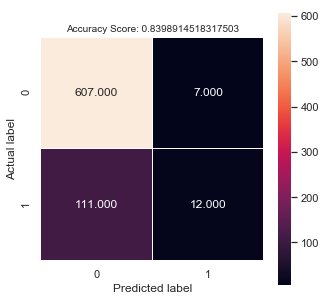

In [216]:
from sklearn.metrics import confusion_matrix, roc_auc_score
cm = confusion_matrix(y_test, logistic)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logistic_score)
plt.title(all_sample_title, size = 10);

The confusion matrix shows 607+12 = 619 correct predictions and 111+7= 118 incorrect ones
- True Positives: 12
- True Negatives: 607
- False Positives: 7 (Type I error)
- False Negatives: 111 ( Type II error)

The model has a high false negative rate, the model predicts no CHD when the patient is at risk of CHD. This is not desirable and therefore the threshold must be adjusted to lower type II error. 

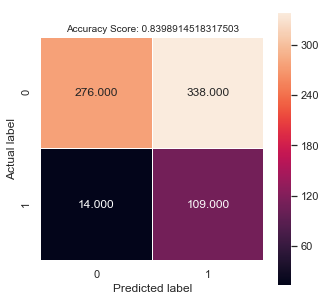

In [217]:
from sklearn.preprocessing import binarize
predict1 = LRM.predict_proba(X_test)
predict2 = binarize(predict1,1/10)[:,1]

cm = confusion_matrix(y_test, predict2)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logistic_score)
plt.title(all_sample_title, size = 10);

The new confusion matrix shows 276+109 = 385 correct predictions and 338+14= 352 incorrect ones
- True Positives: 109
- True Negatives: 276
- False Positives: 338 (Type I error)
- False Negatives: 14 ( Type II error)

Lowering the threshold resulted in decreasing type II error which is desirable in this case. It is much better to be extra cautious.

In [218]:
print("The area under curve before adjusting the threshold ",roc_auc_score(y_test,logistic))
print("The area under curve after lowering the threshold ",roc_auc_score(y_test,predict1[:,1]))

The area under curve before adjusting the threshold  0.5430801620719791
The area under curve after lowering the threshold  0.750258202907762


The AUC value indicates the model's ability in distinguishing between classes. The closer the AUC value to 1 the better the model is in distinguishing between classes. lowering the threshold improved the separability of the model. 

The AUC value is 0.75 indicating that the model has a good ability to distinguish between the classes.

** Next, coefficients from the logistic regression model will be used in a plot to understand the relationship between input variables and the target variables**

In [219]:
LRM.coef_

array([[ 0.54115302,  2.2412632 , -0.08572163,  0.0512674 ,  1.38276137,
         0.51991916,  0.50285115,  0.17740382,  0.22574953,  1.09206562,
         3.41899299, -0.74467885,  0.66431298, -0.41633348,  2.21082496]])

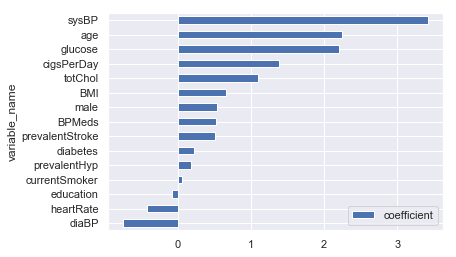

In [220]:
var_names = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']
var_coef = [0.54115302,  2.2412632 , -0.08572163,  0.0512674 ,  1.38276137,
         0.51991916,  0.50285115,  0.17740382,  0.22574953,  1.09206562,
         3.41899299, -0.74467885,  0.66431298, -0.41633348,  2.21082496]

var_= {'variable_name':var_names, "coefficient":var_coef}
var_importance = pd.DataFrame(var_)

var_importance_sorted = var_importance.sort_values(by=['coefficient'], ascending=False)
yyyyyy = var_importance_sorted['variable_name']
var_importance_sorted.plot.barh(x = yyyyyy).invert_yaxis()

The logistic regression model show that systolic pressure is the variable with the most influence on TenYearCHD. However, it will used as an indication of CHD problem rather than a factor. Variables such as age, glucose levels, and cigarettes per day are factors that affect the target variables TenYearCHD.

## Conclusion ##



Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. Heart disease costs the United States about 219 billion dollars each year from 2014 to 2015. Analyzing and predicting the likelihood of developing CHD could help greatly in implementing prevention strategies to decrease the occurrence of CHD and therefore reducing the number of deaths in the US and the cost 

**Exploratory data analysis:** 
- Men are more likely to be diagnosed with CHD than women because men smoke more cigarettes per day
- Current smokers are more likely to be diagnosed with CHD
- Factors such as age, number of cigarettes per day, blood pressure, and glucose levels show likelihood of being diagnosed with CHD
- Factors such as cholesterol levels and body mass index show less likelihood of being diagnosed with CHD 

**Logistic regression**
- The Logistic regression model show a prediction accuracy of 0.853, with 95% confident that the validation score lies between 0.827 and 0.878
- The AUC value is 0.75 indicating that the model's distinguish ability is acceptable 
- The logistic regression model show that systolic pressure is the variable with the most influence on TenYearCHD. However, it will used as an indication of CHD problem rather than a factor. Variables such as age, glucose levels, and cigarettes per day are factors that affect the target variables TenYearCHD

**Suggestions**  
- Increasing the number of entries could help improve the prediction 
- Including more variables such as family history with CHD, race , fasted glucose levels, level of activity, and diet would help with understanding CHD and implementing prevention protocols 

